In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("football.csv")

In [3]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [4]:
df.shape

(660, 15)

A small Dataset

# Some informtion about the columns

**xG** - it is the expected goals per match

**Mins** -number of minimum player played

# Data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

**Inference** :
 15 columns our of which only 4 are string data type so we can do alot of numerical analysis
 

# Data Description

In [7]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.810606,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,6.075315,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,42.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


**Inference**

1) Mins - max looks way off than 75th percentile. - Potential strong outlier- Outlier Treatment required

2) Shots -max also looks look off from the 75th percentile

# Lets check if there are some missing values

In [9]:
df.isnull().sum()

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

**Inference** : There is no missing value so we do not need to preprocess it

# Let us check we are analysing the data for which years

In [15]:
df['Year'].unique()

array([2016, 2017, 2018, 2019, 2020], dtype=int64)

**Inference** : So we are analysing the data from the year 2016-2020

# Univariate Analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


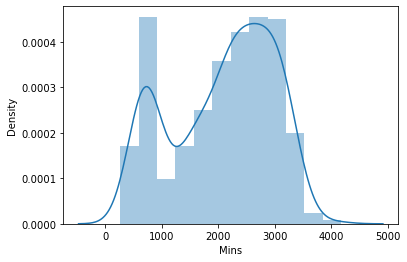

In [18]:
sns.distplot(df['Mins'])
plt.show()

**Inference** : Not a normal distribution curve so some treatment is needed

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


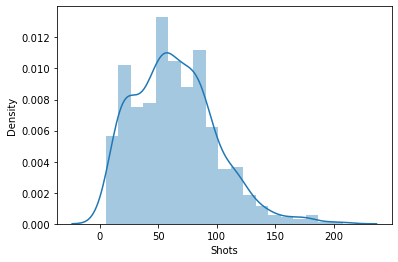

In [20]:
sns.distplot(df['Shots'])
plt.show()

**Inference** :
1) Replicated the same info from the descibr function(regarding the outlier)

2)  The number of shots are most within the range of 50

# Outlier Treatment

In [4]:
u_th = df['Mins'].quantile(0.99)
l_th = df['Mins'].quantile(0.01)
df_filtered = df[(df['Mins'] < u_th) & (df['Mins'] > l_th)]

In [5]:
print(df.shape)
print(df_filtered.shape)

(660, 15)
(646, 15)


In [6]:
((df.shape[0]-df_filtered.shape[0])/ df.shape[0])*100

2.1212121212121215

**Inference** - 2% of the data has been removed in the form of rows which is quite affordable

In [26]:
df.head(2)

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016


# Bivariate Analysis

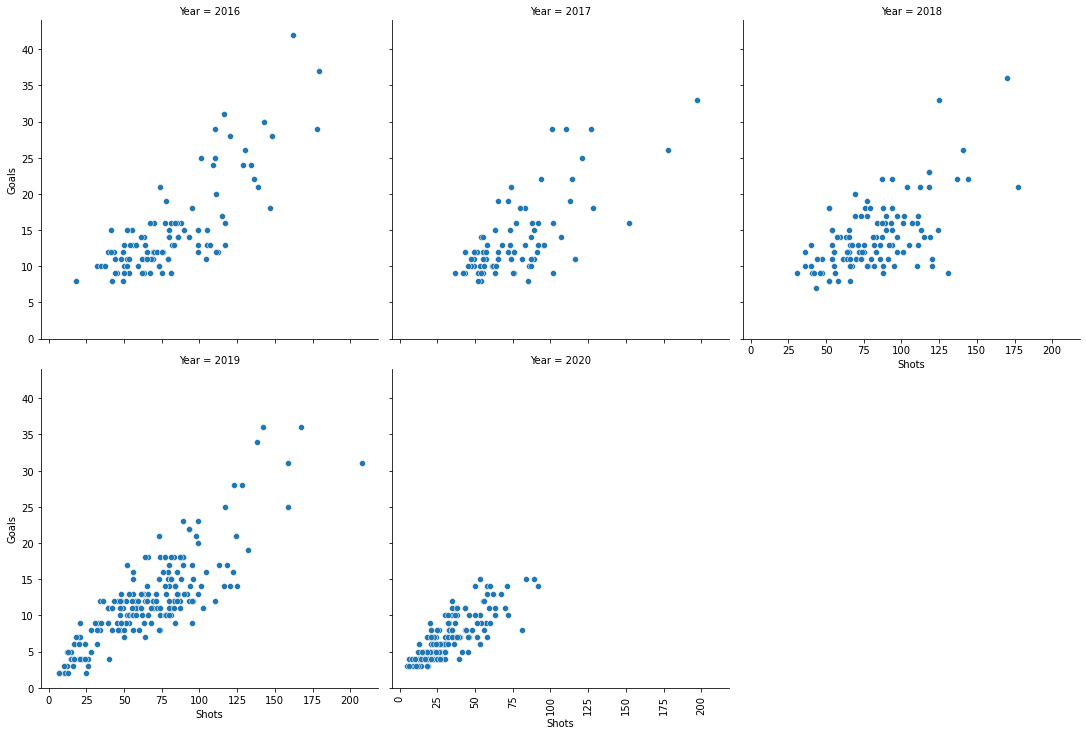

In [38]:
sns.relplot(data = df_filtered, x='Shots', y ='Goals',col='Year',col_wrap=3)
plt.xticks(rotation=90)
plt.show()

**Inference**:
1) A positive correlation can be seen from this, more the number of shots more is the number of goals.

2) We can see a very few number of shots and goals in the Year 2020 maybe because of the covid 19.

3) In the year 2019 we can see a strong concentration of data which means that there were alot of goals and shots taken place in the year 2019.

4) We can see a little bit of outlier as well from the year 2016-2019 which we have already discussed when we talked about the describe function(df.describe)

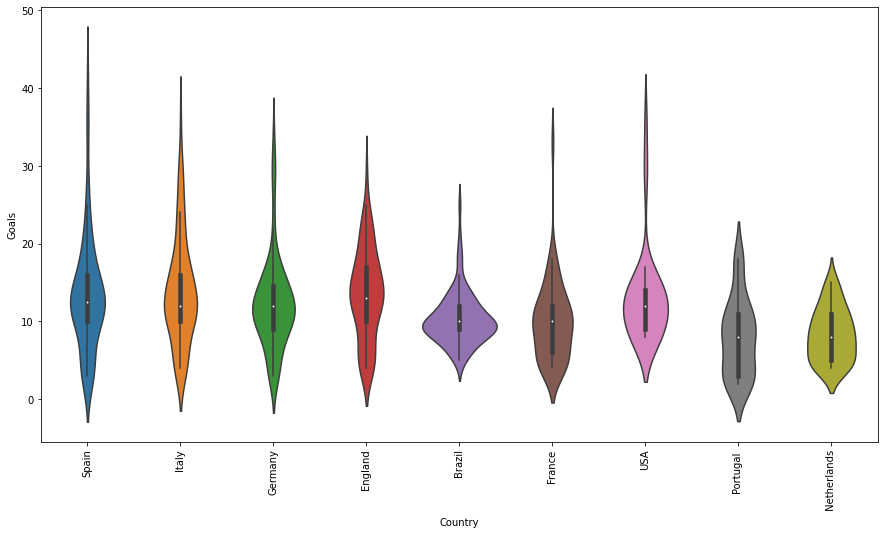

In [48]:
plt.figure(figsize=(15,8))
sns.violinplot(data = df_filtered, x = 'Country', y = 'Goals')
plt.xticks(rotation = 90)
plt.show()

**Inference** :

1) We can see that the median of England is the highest which means that the median of the goals(50 percentile) in England is more than that of the other countries

2) We can see strong outliers in clubs like Spain,Italy,Germany,USA and France

3) The belly seems bulged for Brazil the most which shows a huge concentration of data 

4) There are no observal outliers in Netherlands and Portugal so it indicates the number of goals in these two countries are quite uniform

In [8]:
df.head(1)

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


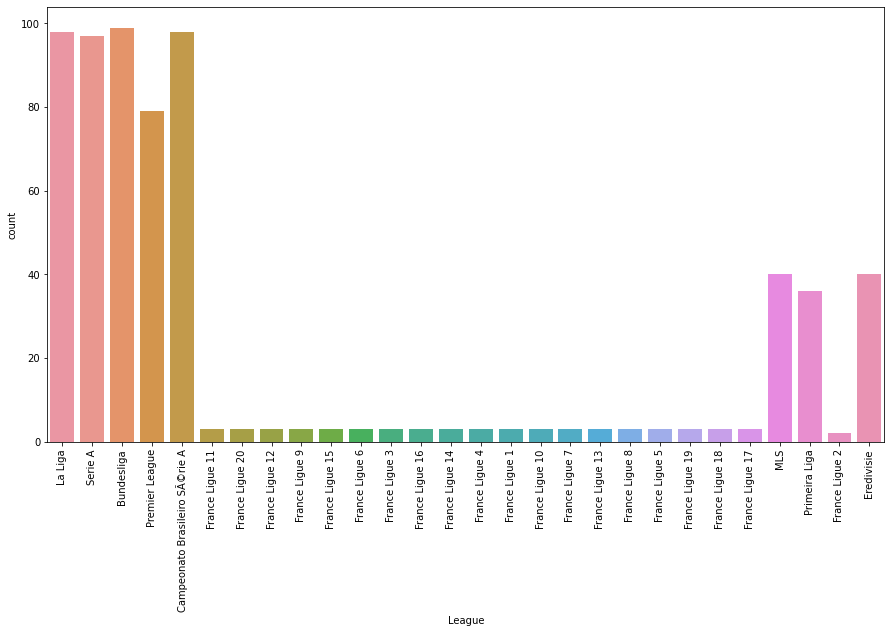

In [10]:

plt.figure(figsize=(15,8))
sns.countplot(df_filtered['League'])
plt.xticks(rotation = 90)
plt.show()

**Inference**

We have mostly the data of the leagues La Liga, Serie A, Bundesliga,Campeonato Brasileiro SÃ©rie A

**Let us check the correlation between the numerical columns**

In [13]:
df_filtered.corr()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
Matches_Played,1.000000,-0.079106,0.983831,0.661385,0.686735,-0.129862,0.783859,0.716899,0.027556,-0.039203,-0.544385
Substitution,-0.079106,1.000000,0.009054,0.039799,0.007578,0.003418,0.001329,0.007670,0.007367,0.027535,-0.221583
Mins,0.983831,0.009054,1.000000,0.677488,0.705622,-0.121190,0.798318,0.728887,0.030281,-0.037342,-0.524914
Goals,0.661385,0.039799,0.677488,1.000000,0.901510,0.422523,0.830668,0.855535,0.451194,0.460288,-0.428889
xG,0.686735,0.007578,0.705622,0.901510,1.000000,0.535589,0.852948,0.848976,0.456758,0.425775,-0.380089
xG Per Avg Match,-0.129862,0.003418,-0.121190,0.422523,0.535589,1.000000,0.241674,0.304558,0.630498,0.672481,0.058506
Shots,0.783859,0.001329,0.798318,0.830668,0.852948,0.241674,1.000000,0.921117,0.569873,0.420660,-0.464659
OnTarget,0.716899,0.007670,0.728887,0.855535,0.848976,0.304558,0.921117,1.000000,0.526347,0.591325,-0.509042
Shots Per Avg Match,0.027556,0.007367,0.030281,0.451194,0.456758,0.630498,0.569873,0.526347,1.000000,0.816649,-0.084272
On Target Per Avg Match,-0.039203,0.027535,-0.037342,0.460288,0.425775,0.672481,0.420660,0.591325,0.816649,1.000000,-0.149703


**Let us see this in the form of a heapmap**

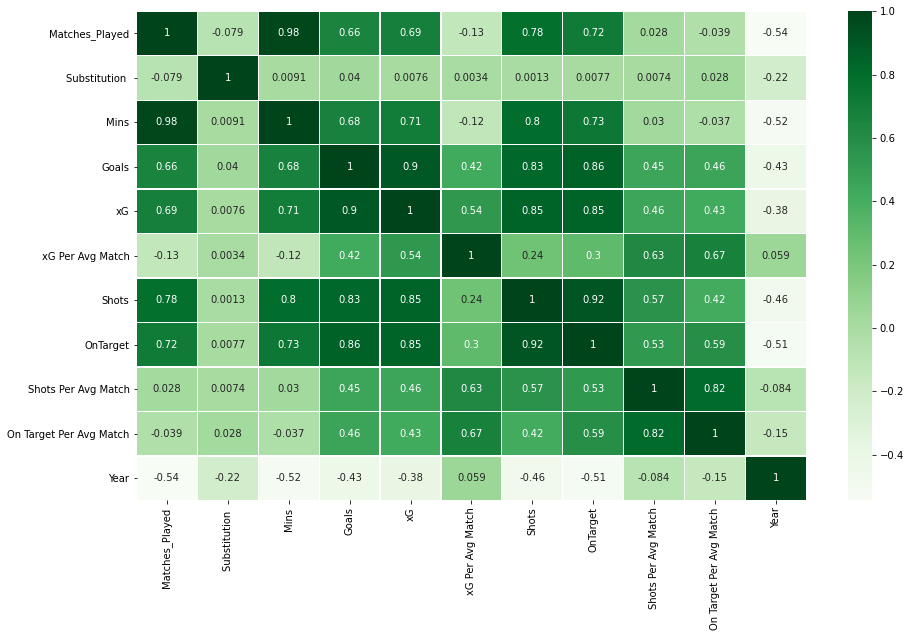

In [36]:
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(df_filtered.corr(),annot=True,linewidth=.2,ax=ax,cmap='Greens')
plt.xticks(rotation=90)
plt.show()

We can see the correlation between every numerical data with the help of this graph

**If we need more better correlation between every category we can even use pairplot**

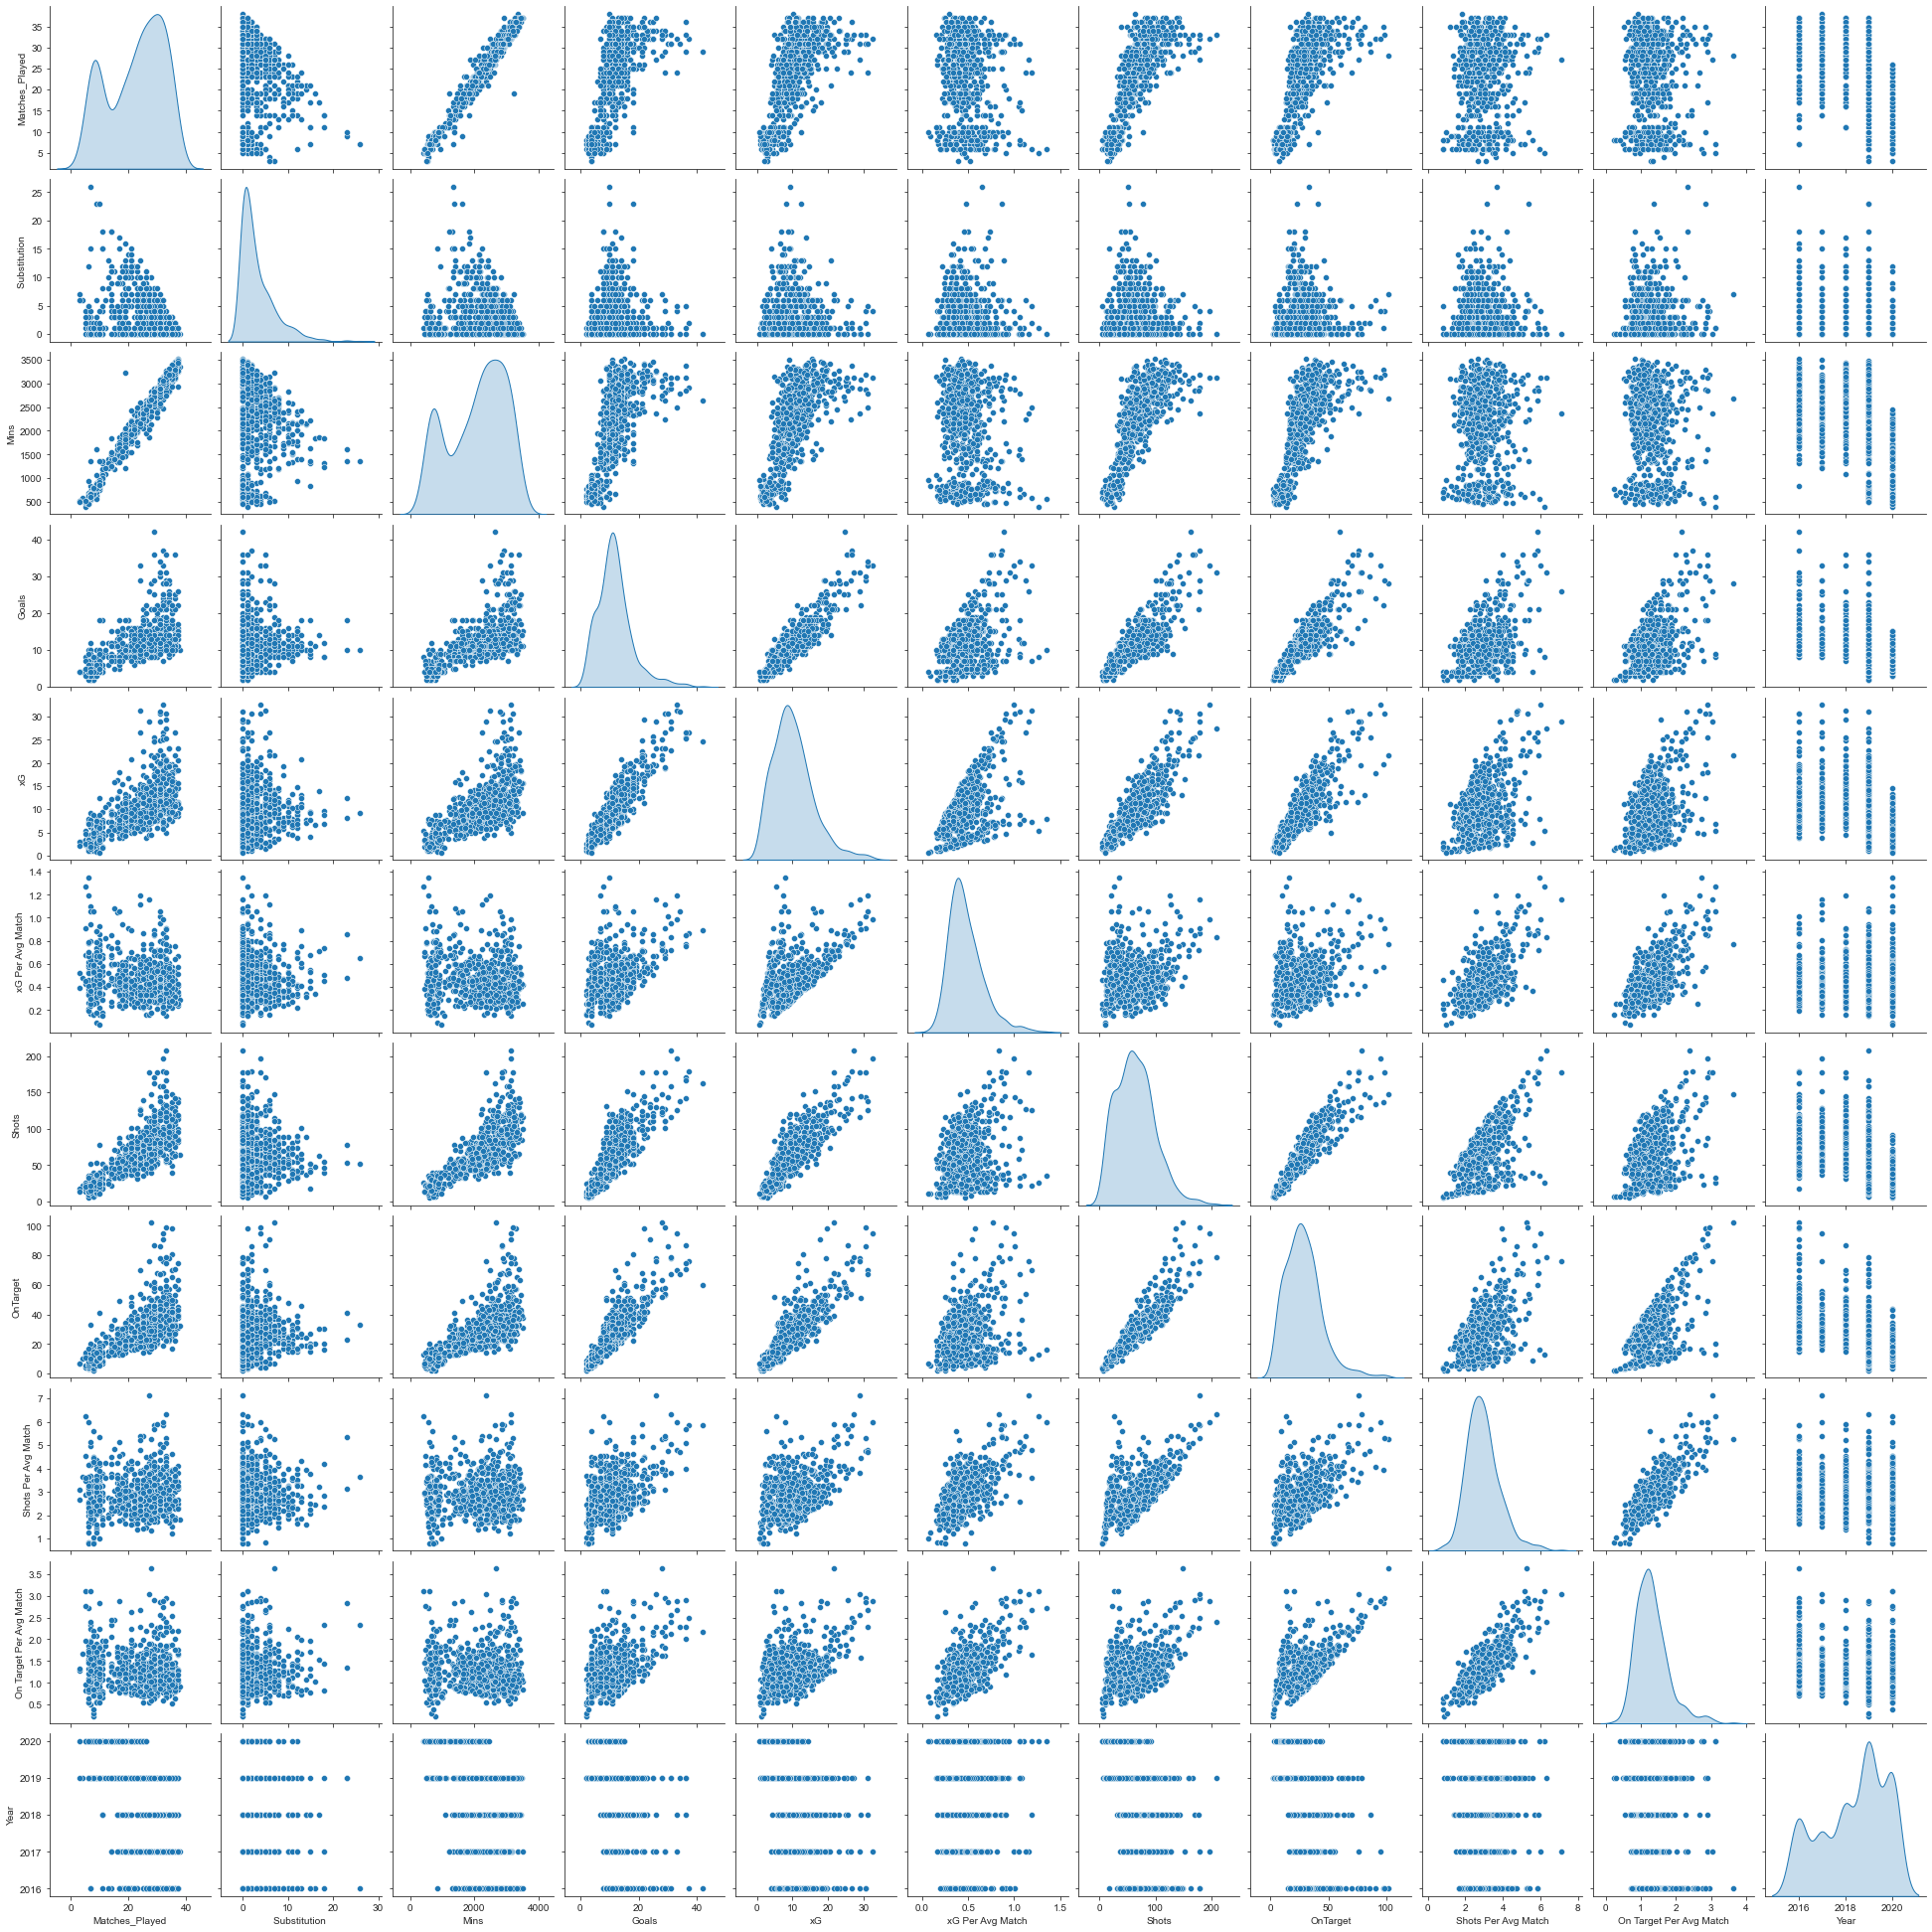

<Figure size 1080x576 with 0 Axes>

In [39]:
sns.set_style("ticks")
sns.pairplot(df_filtered,diag_kind = "kde",kind = "scatter",palette = "husl")
plt.figure(figsize=(15,8))
plt.show()

**Since we have a huge dataset with many numerical columns this might not be clearly visible enough for finding out inferences**

**We should use the heatmap instead**

Also the pairplot might take a little long to run

df.head(1)

*Instead if we want to check the regresion line and plot between 2 columns we can use this as well*

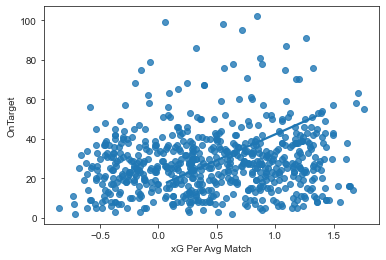

In [45]:
sns.regplot(x="xG Per Avg Match", y="OnTarget", data=df_filtered, x_jitter=1, ci = None)
plt.show()

**So we can see the regression line individually also like this**

**Inference**

This graph shows like a positive correlation which we can also verify from the heatmap

**Other than the countplot we can also use pie chart to check the percentages of available data of any specific columns**

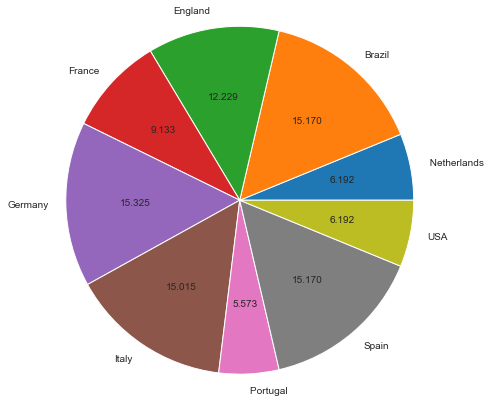

In [55]:
df_filtered.groupby('Country').size().plot(kind='pie',autopct='%.3f',radius=2)
plt.show()

**Inference** :

We can see we have maximum data from the Germany Country with 15.325 % followed up by Spain,Brazil and Italy which also falls under the cvategory of 15% data

The least amount of data which we have is from Portugal which is only 5.573% 

# Lets solve some analytical questions now 

In [56]:
df.head(3)

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016


In [58]:
ds=df_filtered

# **Q1.** Which Top 5  players scored the maximum number of goals all over the years(2016-2020)  

In [59]:
ds.groupby('Player Names')['Goals'].sum().sort_values(ascending=False).head()

Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            90
Name: Goals, dtype: int64

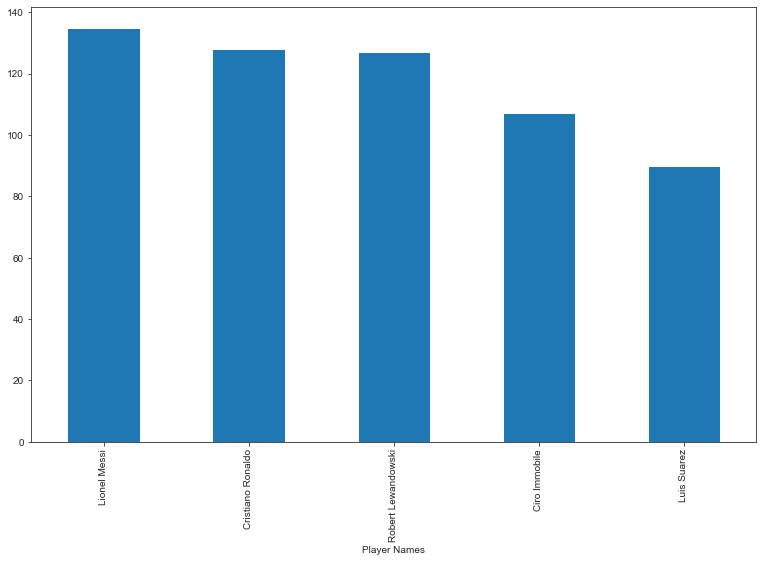

In [60]:
ds.groupby('Player Names')['Goals'].sum().sort_values(ascending=False).head().plot.bar(figsize=(13,8))
plt.show()

**Answer**

We can see Lionel Messi scored the highest with 135 goals followed up by,
Cristiano Ronaldo with 128,
Robert Lewandowski with 127,
Ciro Immobile with 107 and 
Luis Suarez with 90 goals          

# Q2.  Cristiano Ronaldo scored the maximum goals in which year from 2016 to 2020

In [69]:
de=ds[df['Player Names'].str.contains('Cristiano Ronaldo')]

<ipython-input-69-83f518f4b948>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  de=ds[df['Player Names'].str.contains('Cristiano Ronaldo')]


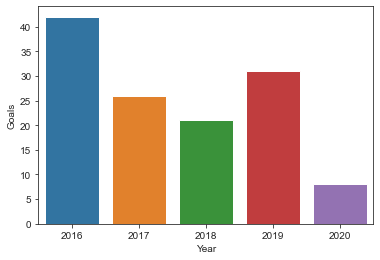

In [65]:
sns.barplot(data=de,x='Year',y='Goals')
plt.show()

**Answer**

We can see Cristiano Ronaldo scored the maximum goals in the year of 2016

# Q3. Among all the Leagues where Neymar played where does he have the highest average shots

In [74]:
de=ds[df['Player Names'].str.contains('Neymar')]

<ipython-input-74-7d4849a039d4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  de=ds[df['Player Names'].str.contains('Neymar')]


In [75]:
de.groupby('League')['Shots'].mean().sort_values(ascending=False)

League
La Liga           105
France Ligue 7     71
France Ligue 6     54
Name: Shots, dtype: int64

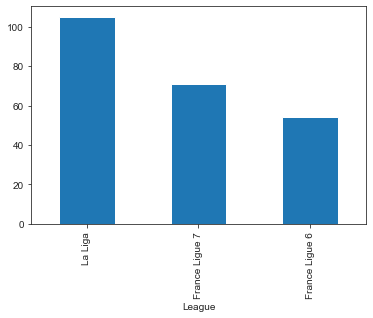

In [78]:
de.groupby('League')['Shots'].mean().sort_values(ascending=False).plot.bar()
plt.show()

**Answer**

Neymar has the highest average shots when he played in La Liga

In [80]:
df.head(2)

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016


# Q4. In the year 2016 who has more xG(Expected Goals per Match)  between Ronaldo and Messi

In [84]:
de=ds[(ds['Year']==2016)&((ds['Player Names']=='Lionel Messi')|(ds['Player Names']=='Cristiano Ronaldo'))]

In [88]:
de

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
5,Spain,La Liga,(JUV),Cristiano Ronaldo,29,0,2634,42,24.68,0.89,162,60,5.84,2.16,2016
12,Spain,La Liga,(BAR),Lionel Messi,32,2,2910,37,26.65,0.87,179,76,5.84,2.48,2016


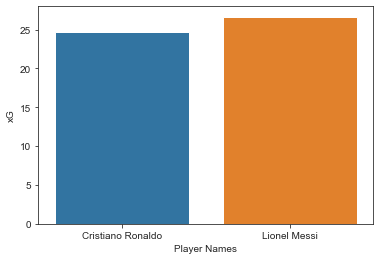

In [92]:
sns.barplot(data=de,x='Player Names',y='xG')
plt.show()

**Answer**

We can see Messi has more xG compared to Ronaldo in the year 2016

#  Q5. In the year 2019 who has more Goals between Ronaldo and Messi

In [93]:
de=ds[(ds['Year']==2019)&((ds['Player Names']=='Lionel Messi')|(ds['Player Names']=='Cristiano Ronaldo'))]

In [94]:
de

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
333,Spain,La Liga,(BAR),Lionel Messi,32,1,3067,25,21.63,0.67,159,68,4.93,2.11,2019
385,Italy,Serie A,(JUV),Cristiano Ronaldo,33,0,3127,31,27.32,0.83,208,79,6.32,2.40,2019


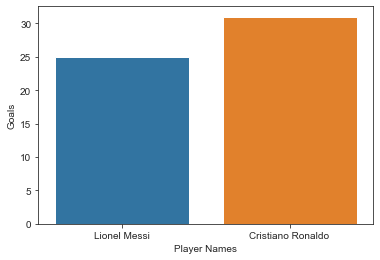

In [95]:
sns.barplot(data=de,x='Player Names',y='Goals')
plt.show()

**Answer**

We can see Ronaldo has more goals than Messi in the year 2019

In [96]:
ds.head(1)

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016


# Q6. Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020

In [105]:
de=ds[ds['Year']==2020]

In [106]:
de.groupby('Country')['OnTarget'].median().sort_values(ascending=False)

Country
 Netherlands    25.5
USA             20.0
Brazil          17.0
England         10.5
Italy           10.0
France           9.5
Germany          9.0
Spain            8.0
Name: OnTarget, dtype: float64

<AxesSubplot:xlabel='Country'>

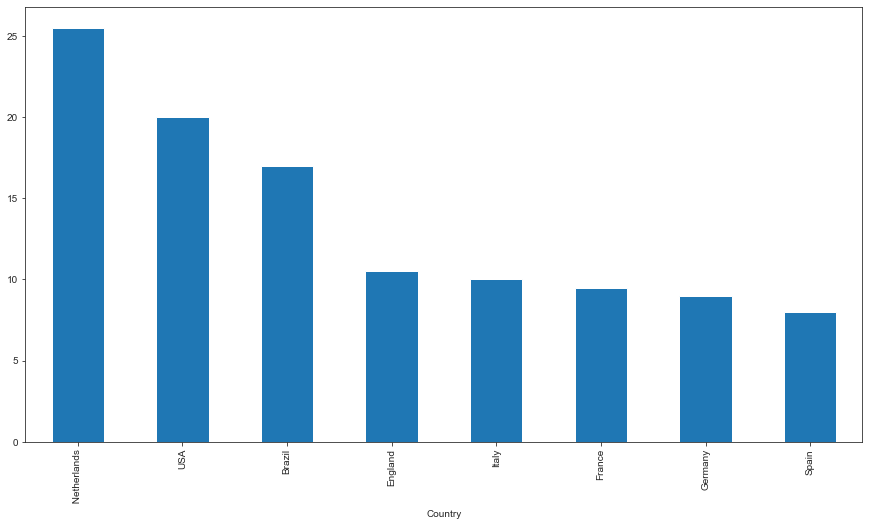

In [108]:
de.groupby('Country')['OnTarget'].median().sort_values(ascending=False).plot.bar(figsize=(15,8))

**Answer**

We can see Netherlands has the maximum OnTarget Shots followerd by up USA,Brazil and as so on

# Which top 4 club has the minimum goals all over the years

In [117]:
ds.groupby('Club')['Goals'].sum().sort_values().head(4)

Club
(NAC)    3
(GIL)    3
(BOA)    3
(DIJ)    4
Name: Goals, dtype: int64

<AxesSubplot:xlabel='Club'>

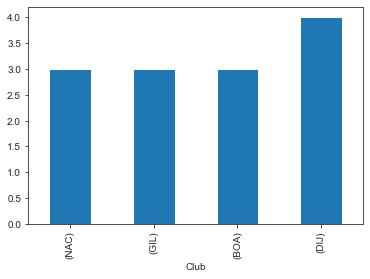

In [121]:
ds.groupby('Club')['Goals'].sum().sort_values().head(4).plot.bar()

**Answer**

Club with the minimum goals are NAC,GIJ,BOA and DIJ

# Which top 3 player has the least On Target Per Avg Match in the year 2018

In [122]:
de=ds[ds['Year']==2018]

In [124]:
de.groupby('Player Names')['On Target Per Avg Match'].sum().sort_values().head(3)

Player Names
Henrique        0.55
Juan Cazares    0.69
Joshua King     0.70
Name: On Target Per Avg Match, dtype: float64

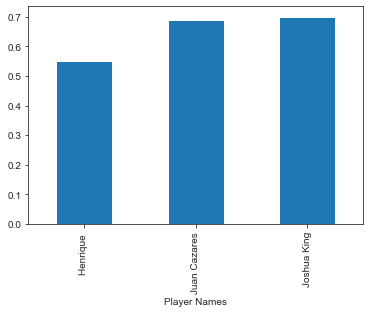

In [128]:
de.groupby('Player Names')['On Target Per Avg Match'].sum().sort_values().head(3).plot.bar()
plt.show()

**Answer**

Players with least On Target Per Avg Match are Henrique , Juan Cazares and Joshua King  

****Like this we can built our own various types of questions and can be solved easily with the help of numpy,pandas and seaborn****